## Machine Learning in Python

*Prepared by:*
**Jude Michael Teves**  

This notebook shows how perform basic machine learning using sklearn.

## Preliminaries

### Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

sns.set_style('darkgrid')

sns.set_palette('Set2')
# sns.color_palette('Set2')

C:\Anaconda\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Load Dataset

We'll be using the **Iris dataset** for this exercise. The dataset contains 3 classes:
 - 0 - Iris-Setosa
 - 1 - Iris-Versicolour
 - 2 - Iris-Virginica

We will also be splitting the dataset into train and test sets.

In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

X, y = datasets.load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Original Size | Input: {X.shape}, Output: {y.shape}")
print(f"Train Set Size | Input: {X_train.shape}, Output: {y_train.shape}")
print(f"Test Set Size | Input: {X_test.shape}, Output: {y_test.shape}")

Original Size | Input: (150, 4), Output: (150,)
Train Set Size | Input: (120, 4), Output: (120,)
Test Set Size | Input: (30, 4), Output: (30,)


### Visualize the data

It is a good practice to visualize the dataset first.

In [3]:
# columns = datasets.load_iris()['feature_names'] + ['target']

train_set = np.concatenate((X_train, y_train.reshape(-1,1)), axis=1)
df_train = pd.DataFrame(train_set, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'target'])
# df_train = pd.DataFrame(train_set, columns=columns)
df_train['target'] = df_train['target'].astype(int)

test_set = np.concatenate((X_test, y_test.reshape(-1,1)), axis=1)
df_test = pd.DataFrame(test_set, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'target'])
# df_test = pd.DataFrame(test_set, columns=columns)
df_test['target'] = df_test['target'].astype(int)

df_train.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,4.6,3.6,1.0,0.2,0
1,5.7,4.4,1.5,0.4,0
2,6.7,3.1,4.4,1.4,1
3,4.8,3.4,1.6,0.2,0
4,4.4,3.2,1.3,0.2,0


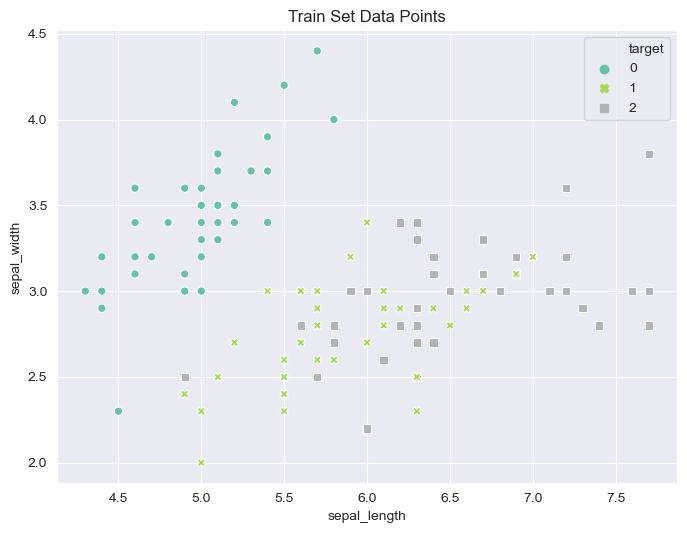

In [4]:
plt.figure(figsize=(8,6), dpi=100)

sns.scatterplot(data=df_train, x='sepal_length', y='sepal_width', hue='target', style='target', palette="Set2")

plt.title('Train Set Data Points')
plt.show()

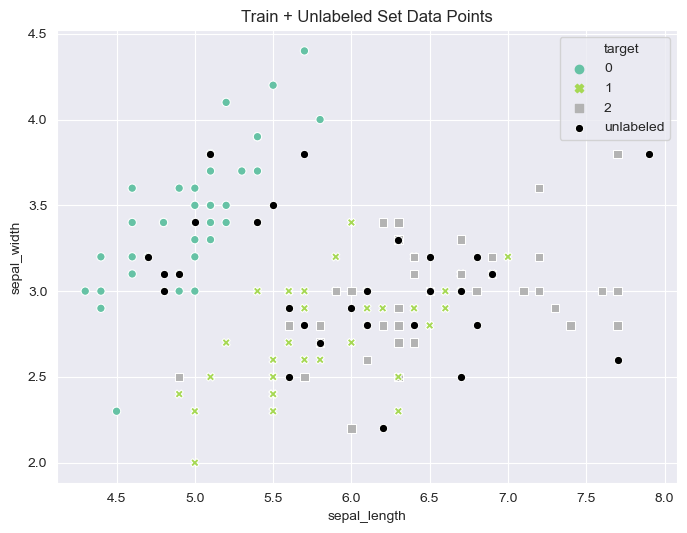

In [5]:
plt.figure(figsize=(8,6), dpi=100)

sns.scatterplot(data=df_train, x='sepal_length', y='sepal_width', hue='target', style='target', palette="Set2")
sns.scatterplot(data=df_test, x='sepal_length', y='sepal_width', color='black', label='unlabeled')

plt.title('Train + Unlabeled Set Data Points')
plt.show()

## Modeling using sklearn

**What is sklearn?**
> "Scikit-learn is an open source machine learning library that supports supervised and unsupervised learning. It also provides various tools for model fitting, data preprocessing, model selection and evaluation, and many other utilities." 

For more details, please refer to <a href="https://scikit-learn.org/stable/getting_started.html">sklearn website</a>.

sklearn has classification and regression implementations for many machine learning models. We'll be using them in the following examples. 

In practice, we often use the `sklearn` library to do machine learning. We can do train and evaluate an ML model with the following lines of code:

### **TL;DR Code**

```python
model = ... # use appropriate model and set necessary hyperparameters.
model.fit(X_train, y_train) # train the model using train set.
model.score(X_test, y_test) # predict the test set and evaluate the results.
```

This is applicable to almost all (if not all) ML algorithms in sklearn. Note that this is the simplest case and a naive way of doing things. This could work if you have a very easy problem/dataset. Normally, you will be doing other things such as preprocessing, normalization, feature engineering, and hyperparameter optimization in between.

## Classification

Let's do classification using sklearn

### Model Training

In [6]:
from sklearn.neighbors import KNeighborsClassifier

In [7]:
clf = KNeighborsClassifier(n_neighbors=3, p=2, n_jobs=-1) # instantiate model
clf.fit(X_train, y_train) # train the model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=3, p=2,
                     weights='uniform')

### Prediction

In [8]:
y_pred = clf.predict(X_test) # predict the corresponding labels given the trained model and input matrix
y_pred[:5]

array([1, 0, 2, 1, 1])

### Evaluation

By default, this uses the accuracy metric.

In [9]:
score = clf.score(X_test, y_test) # predicts and evaluates in one line
print(f"Test Set Score: {score:.2%}")

Test Set Score: 100.00%


Since this is an easy dataset, we were able to get very high accuracies for both train and test set.

Let's also compute for other classification metrics.

In [10]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### Visualize our predictions

In [11]:
y_pred = clf.predict(X_test)

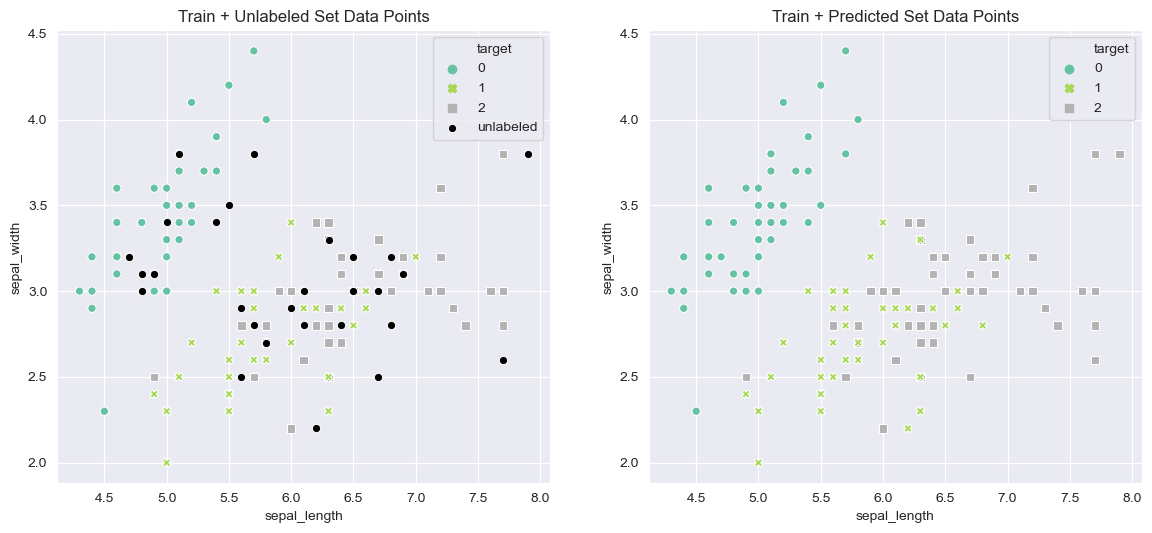

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6), dpi=100)

pred_set = np.concatenate((X_test, np.array(y_pred).reshape(-1,1)), axis=1)
df_pred = pd.DataFrame(pred_set, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'target'])
df_pred['target'] = df_pred['target'].astype(int)

df_pred = pd.concat([df_train, df_pred])

sns.scatterplot(data=df_train, x='sepal_length', y='sepal_width', hue='target', style='target', palette="Set2", ax=ax1)
sns.scatterplot(data=df_test, x='sepal_length', y='sepal_width', color='black', label='unlabeled', palette="Set2", ax=ax1)
sns.scatterplot(data=df_pred, x='sepal_length', y='sepal_width', hue='target', style='target', palette="Set2", ax=ax2)

ax1.set_title('Train + Unlabeled Set Data Points')
ax2.set_title('Train + Predicted Set Data Points')
plt.show()

## Regression

Regression is very similar to classification in sklearn.

We'll be using another dataset for the regression task since we need continuous values as labels / outputs / targets. One readily-available dataset for this is the **Boston dataset**. It contains the house pricing data in Boston as well as the following features:

 - CRIM per capita crime rate by town
 - ZN proportion of residential land zoned for lots over 25,000 sq.ft.
 - INDUS proportion of non-retail business acres per town
 - CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 - NOX nitric oxides concentration (parts per 10 million)
 - RM average number of rooms per dwelling
 - AGE proportion of owner-occupied units built prior to 1940
 - DIS weighted distances to five Boston employment centres
 - RAD index of accessibility to radial highways
 - TAX full-value property-tax rate per \$10,000
 - PTRATIO pupil-teacher ratio by town
 - B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 - LSTAT % lower status of the population
 - MEDV Median value of owner-occupied homes in $1000’s

For more info, please see <a href="https://scikit-learn.org/stable/datasets/index.html#boston-dataset">this link</a>.

And, as usual, we will also be splitting the dataset into train and test sets.

In [13]:
X, y = datasets.load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Original Size | Input: {X.shape}, Output: {y.shape}")
print(f"Train Set Size | Input: {X_train.shape}, Output: {y_train.shape}")
print(f"Test Set Size | Input: {X_test.shape}, Output: {y_test.shape}")

Original Size | Input: (506, 13), Output: (506,)
Train Set Size | Input: (404, 13), Output: (404,)
Test Set Size | Input: (102, 13), Output: (102,)


### Model Training

In [14]:
from sklearn.neighbors import KNeighborsRegressor

In [15]:
reg = KNeighborsRegressor(n_neighbors=3, p=2, n_jobs=-1) # instantiate model
reg.fit(X_train, y_train) # train the model

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=-1, n_neighbors=3, p=2,
                    weights='uniform')

### Prediction

In [16]:
y_pred = reg.predict(X_test) # predict the corresponding labels given the trained model and input matrix
y_pred[:5]

array([25.1       , 32.76666667, 14.6       , 31.        , 17.13333333])

### Evaluation

By default, sklearn uses R-squared when evaluating regression tasks.

In [17]:
score = reg.score(X_test, y_test) # predicts and evaluates in one line
print(f"Test Set Score: {score:.2%}")

Test Set Score: 70.46%


## End
<sup>made by **Jude Michael Teves**</sup> <br>
<sup>for comments, corrections, suggestions, please email:</sup><sup> <href>judemichaelteves@gmail.com</href> or <href>jude.teves@dlsu.edu.ph</href></sup><br>